In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv("data_stocks.csv")

In [3]:
ds.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
ds.set_index('DATE',inplace=True)

In [5]:
ds.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
ds_AAPL = ds[['NASDAQ.AAPL']].copy()

In [7]:
ds_AAPL.tail()

,NASDAQ.AAPL
DATE,
1504209360,164.11
1504209420,164.12
1504209480,164.01
1504209540,163.88
1504209600,163.98


In [8]:

ds_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

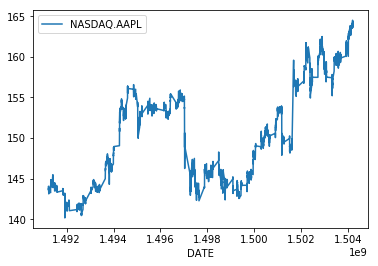

In [9]:
ds_AAPL.plot();

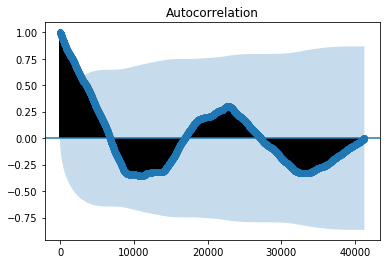

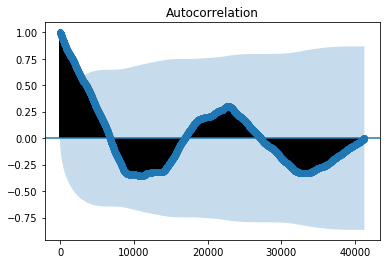

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_AAPL)

# converting series to stationary

In [11]:
ds_AAPL.shift(1).head()

,NASDAQ.AAPL
DATE,
1491226200,NaN
1491226260,143.6800
1491226320,143.7000
1491226380,143.6901
1491226440,143.6400


In [12]:
X = ds_AAPL.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA MODEL

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
import itertools
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [15]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 170326.9720446082
(0, 0, 1) 131018.03599865196
(0, 0, 2) 95780.67244459376
(0, 1, 0) -64708.71200636141
(0, 1, 1) -64706.87731534093
(0, 1, 2) -64718.28609667219
(0, 1, 3) -64719.679999093336
(0, 1, 4) -64724.74650243526
(0, 1, 5) -64723.27395756352
(0, 2, 0) -44617.132207470204
(0, 2, 1) -64678.29151691341
(1, 0, 0) -64703.106011542375
(1, 0, 1) -64701.25996924186
(1, 0, 2) -64712.567383996124
(1, 0, 3) -64714.01381863287
(1, 0, 4) -64719.0074137458
(1, 0, 5) -64717.5164733491
(1, 1, 0) -64706.87029558887
(1, 1, 1) -64714.63157445872
(1, 1, 2) -64725.38695946308
(1, 2, 0) -52566.60024359111
(1, 2, 1) -64686.66043852946
(1, 2, 2) -64694.1299628142
(1, 2, 3) -64689.99041511079
(1, 2, 4) -64699.29723763057
(1, 2, 5) -64699.32675981721
(2, 0, 0) -64701.253455138794
(2, 0, 1) -64709.0573636285
(2, 1, 0) -64717.930868098585
(2, 1, 1) -64725.40319963453
(2, 2, 0) -56350.17877202261
(2, 2, 1) -64659.76449341433
(2, 2, 2) -64677.50077770966
(2, 2, 3) -64691.42484484856
(2, 2, 4) -646

In [16]:
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94385929256


In [17]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361415, 150.61507157, 150.61484587, ..., 153.58363093,
       153.58387083, 153.58411072])

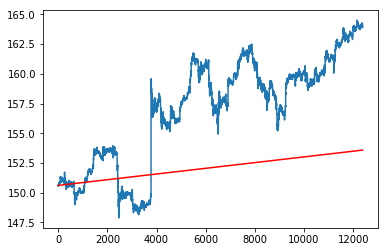

In [19]:
plt.plot(test)
plt.plot(predictions, color='red');

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.55413489282507